# Exercise 5: Plots and Maps 


*This notebook has been created by Julia Kukulies (julia.kukulies@gu.se) as a modified version from the exercise for GVN370 that has been created by Céline Heuzé.*

To start gently this second week, we are going to make some figures. First, we will see again the
functions of last week to plot 1D timeseries. Then, we will make some maps. After one week of hard
work, I trust that you will today be able to load the data very quickly.


Today, we will:

- Plot several timeseries on the same graph and set their style;
- Produce a simple world map of your data;
- Produce maps with different projections, notably stereographic.
- The two most important Python packages for these tasks are [matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/introduction.html) and [cartopy](https://scitools.org.uk/cartopy/docs/latest/). !Note that **xarray** also has standard plot functions, but we will focus on using the basic packages because they are much more flexible in case you at some point work with data that you do not access as xarrays
- We will work with the hourly global sea ice from ERA5, as it is the best to illustrate the effect of choosing different map projections, but feel free to work with the file you want.

In [1]:
# as always 
import numpy as np

import matplotlib.pyplot as plt 
# I like seaborn for line plots, but you can also just use matplotlib 
import seaborn as sns

# for maps 
import cartopy
# for projections 
import cartopy.crs as ccrs
# for colorbar customizing
import matplotlib.colors as colors


**If you are have not installed cartopy yet, please run:**

In [ ]:
!pip install cartopy

# Plot several timeseries on the same graph and set their style 

As usual, define the correct path; use **xarray** to get your data. Produce three timeseries. If you
are short of inspiration, do a Hovmöller diagram (see ex4) to see which locations look interesting. I
defined mine as:

In [2]:
import xarray as xr
f= 'ERA5_hourly_seaice_global_March2020.nc'
data= xr.open_dataset(f)
sicons = data.siconc

In [3]:
# note that the longitudes are from 0 to 360, not starting from 180!
# note also that you have to remove the extra dim expver again 
sic1 = data.sel(latitude = 80 , longitude = 0 , method = 'nearest').siconc.values 
sic2= data.sel(latitude = 79, longitude = 0, method = 'nearest').siconc.values
sic3 = data.sel(latitude = 78, longitude =  0, method = 'nearest').siconc.values   

By default, you get sad thin lines, with standard colors (that you could define in a separate file, but this is really beyond of the scope of this course). That’s ugly and not easy to read. As usual, you can make everything nicer if you read the documentation of **matplotlib** or **seaborn** and see all the extra inputs you can give. 


Two of the most important are the color and the line style (plain,dashed etc). Base colours have a letter; black is ’k’, while for the others it is the first letter of their name (’r’ for red, ’y’ for yellow, ’g’ for green). You can also provide a word for any other color of the more complete [color palette](https://matplotlib.org/3.1.0/gallery/color/named_colors.html). Another option is to define your own color as a combination of [RGB](https://matplotlib.org/tutorials/colors/colors.html), which is given as a tuple of float values between 0 and 1 (e.g. (1.0, 1.0, 0.) -> yellow) . On top of that, you can change the thickness of the line with the input *linewidth*. The default value is 1, so make the line thicker by writing 1.5 or 2.

Now, set these styles:
- sic1, dashed, black, very thick;
- sic2, dotted, red, thin;
- sic3, plain, cyan, medium thick.


**Bonus**: Add a [legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the plot.


To save a plot, use [plt.savefig()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html). 

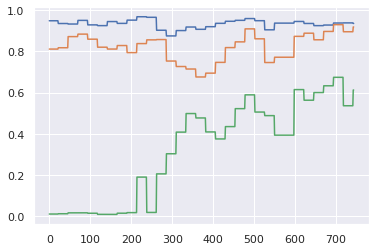

In [43]:
# standard plot 
plt.plot(sic1)
plt.plot(sic2)
plt.plot(sic3)

plt.savefig('standard_lineplot.png')
plt.show()

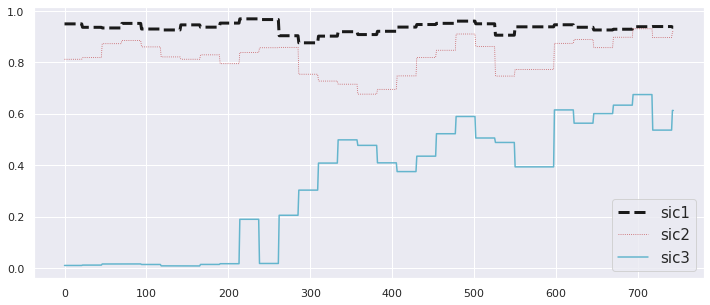

In [4]:
# changed size
plt.figure(figsize= (12,5))

# seaborn plot style 
sns.set()

# changes styles
plt.plot(sic1 ,color ='k', linestyle = '--',linewidth = 3, label = 'sic1')
plt.plot(sic2,  color='r', linestyle=':',linewidth = 0.8, label = 'sic2')
plt.plot(sic3, color='c', linewidth = 1.5, label = 'sic3')
plt.legend(fontsize= 15)

plt.savefig('changed_style.png')
plt.show()

Finally, we need to improve these axes!

1. **Remove the white at the end of the series by setting the x-axis limits.**

A small sidenote here is: avoid hardcoded values wherever you can. So instead of writing "372" as the maximum limit, you can define it as the maximum should be the shape of the sst array. That makes your code more general if you reuse it and it is less prone to mistakes in case the shape would change after some operations.

[plt.xlim(0,sst1.shape[0])](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html)

2. **Have one tick every 5 days (remember, here I work with hourly data) and label it with days from datetime format**


[plt.xticks( ticks = np.arange(sic1.shape[0])[::5* 24], labels = data.time.dt.day[::5*24] )](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html)


3. **Name your axes**

[plt.xlabel('Day of February 2020')](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html)

[plt.ylabel('Sea ice concentration')](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html)



4. **Only needed if you do not use seaborn style: have grid lines instead of just ticks**

[plt.grid()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html)


Much better! That’s the level of plotting that is expected in your theses.



Another sidenote which can be good to know: **matplotlib** is sometimes confusing because the above name functions can be used for the plot object or on a specific axis. When using suplots, example, each of the functionslook slightly different and contians the word "set" in many cases, e.g. [plt.xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html) becomes [ax.set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html)). 

# Produce a simple word map of you data 

Produce a 2D longitude x latitude field. I just used the first timestep and defined sic2D=data.siconc[0,:,:]). 


Just check whether your longitude is on 0:360 or -180:180. In this course we will not change that, but
in the future, you can make your figures more relevant by putting the reference somewhere else. For
example, to show all ocean basins, shift the map reference to 20°E. If you want the usual map with
Europe at the centre, make sure you are on -180:180.


I recommend you use the “Robinson” projection, as it is one of the least distorting. [Read more about the projections supported by cartopy here](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html):

In [65]:
sic2D = data.siconc[0,:,:]

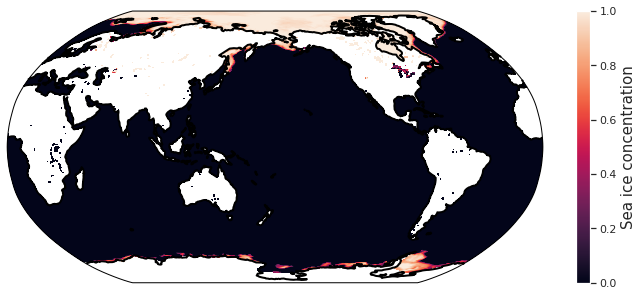

In [125]:
# set projection and extent 
plt.figure(figsize= (12,5))


ax = plt.axes(projection=ccrs.Robinson(central_longitude= 180))
# plot (plotting function can be any, instead you could for example also use plt.contourf() )
m =plt.pcolormesh(sic2D.longitude.values, sic2D.latitude.values, sic2D, transform= ccrs.PlateCarree(), vmin = 0, vmax = 1)

# add coastlines 
ax.coastlines(color = 'black', linewidth = 2.0)

# colorbar formatting
cbar= plt.colorbar(m)
cbar.set_label('Sea ice concentration', fontsize = 15)


#save figure as png 
plt.savefig('robinson.png')
plt.show()

NB1: for this type of data, rather than showing places that are obviously at 0, it can be clever to set
the 0-values to NaN instead to highlight where it is not 0
-> sic2D[sic2D==0]= np.nan


NB2: if you do not like the default colour scheme, by defining the input argument *cmap* in the plot function with your favourite [colormap](https://matplotlib.org/tutorials/colors/colormaps.html)

# Produce maps with different projections, e.g. stereographic

The various inputs you can give to [plt.axes()](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.axes.html) using cartopy allow you to select a specific part of the world and change the type of projection you use.


When looking at sea ice for example, it does not make sense to plot the entire globe. Instead, you
should be looking at the Arctic or Antarctica by choosing [**the stereographic projection**](https://scitools.org.uk/cartopy/docs/v0.15/examples/always_circular_stereo.html). It is a bit of a struggle with cartopy, because you need to define cyclic coordinates when you want to show a circle map rather than a rectangle. But this is just code you can save somewhere and copy and paste it whenever you need to make such a plot :) 

It plots a circle, centered on the latitude and longitude you indicate, and with the radius you set. In
my case, I am centered on the North Pole and will plot with a radius of 30°, i.e. down to 60°N. Note
that you can use it for any region when you want to have some fancy “you are looking at a globe”
effect, not just for the poles.
Anyway, if I replot sic2D with this stereographic projection, I obtain:

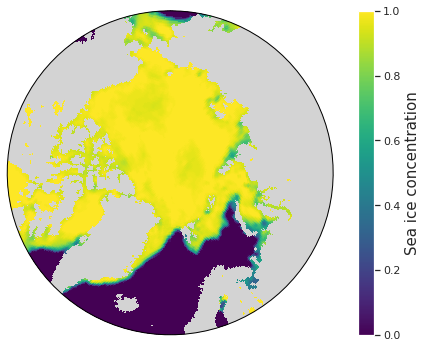

In [123]:
import matplotlib.path as mpath
from cartopy.util import add_cyclic_point as cycpt 

fig = plt.figure(figsize=[15, 5])


ax1 = plt.subplot(1, 2, 2, projection=ccrs.NorthPolarStereo())
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, 90, 60], ccrs.PlateCarree())

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
# get cyclic coordinates for projection
ax1.set_boundary(circle, transform = ax1.transAxes)
data_cyclic, lon_cyclic = cycpt(sic2D, sic2D.longitude.values)
lon_cyclic= np.ma.getdata(lon_cyclic)
data_cyclic = np.ma.getdata(data_cyclic) 
lons2d, lats2d = np.meshgrid(lon_cyclic, sic2D.latitude.values)

m= ax1.pcolormesh(lons2d, lats2d, data_cyclic, cmap = 'viridis', transform= ccrs.PlateCarree(), vmin = 0, vmax = 1)


# add coastlines 
ax.coastlines(color = 'black', linewidth = 2.0)

# colorbar formatting
cbar= plt.colorbar(m)
cbar.set_label('Sea ice concentration', fontsize = 15)

plt.show()

**Your turn: plot the sea ice around Antarctica. Plot the sea surface height in the North Sea. The sea
surface temperature in the Baltic. Plot anything you want!**